# Grid Search

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


## Importing the dataset

In [4]:
df = pd.read_csv('Healthcare_data.csv')
df_variable = pd.read_csv('Healthcare_dataset.csv')
dataset = pd.DataFrame()

for column in df.columns:
    if df[column].dtype == 'object':
        encoder = LabelEncoder()
        encoded_values = encoder.fit_transform(df[column])
        dataset[column] = encoded_values
    else:
        dataset[column] = df[column]
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [13]:
list1 =[i for i in df_variable['Variable']]
print(list1)

['Patient ID', 'Persistency_Flag', 'Age', 'Race', 'Region', 'Ethnicity', 'Gender', 'IDN Indicator', 'NTM - Physician Specialty', 'NTM - T-Score ', 'Change in T Score ', 'NTM - Risk Segment', 'Change in Risk Segment', 'NTM - Multiple Risk Factors', 'NTM - Dexa Scan Frequency', 'NTM - Dexa Scan Recency', 'Dexa During Therapy', 'NTM - Fragility Fracture Recency', 'Fragility Fracture During Therapy', 'NTM - Glucocorticoid Recency', 'Glucocorticoid Usage During Therapy', 'NTM - Injectable Experience', 'NTM - Risk Factors', 'NTM - Comorbidity ', 'NTM - Concomitancy', 'Adherence']


## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Kernel SVM model on the Training set

In [5]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

## Making the Confusion Matrix

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[241   1   1   0   0   0   0   0]
 [  0 318   4   3   0   0   0   0]
 [  0   0 180   4   0   0   0   0]
 [  0   0  11  63   0   0   0   0]
 [  0   0   1  23   0   0   0   0]
 [  0   0   0   2   1   0   0   0]
 [  0   0   0   1   0   0   0   0]
 [  0   0   0   2   0   0   0   0]]


0.9369158878504673

<AxesSubplot:>

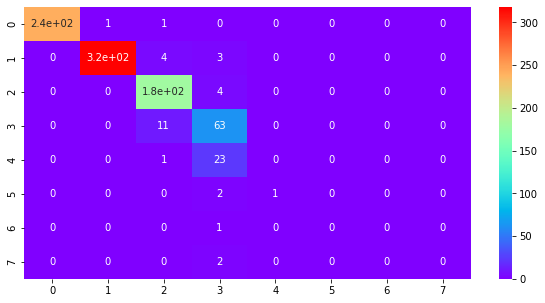

In [10]:
plt.figure(figsize=[10,5])

sns.heatmap(cm,annot=True,cmap='rainbow')

## Applying k-Fold Cross Validation

In [7]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Accuracy: 92.56 %
Standard Deviation: 1.35 %


## Applying Grid Search to find the best model and the best parameters

In [8]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Best Accuracy: 98.83 %
Best Parameters: {'C': 0.25, 'kernel': 'linear'}
